<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%205.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B0/%D0%A2%D0%B5%D0%BC%D0%B0_5_2_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 5.2. Прогнозирование временных рядов с помощью градиентного бустинга

#5.3.  Градиентный бустинг


В предыдущих разделах мы изучили способы объединения базовых алгоритмов в ансамбль с помощью бэггинга, включая построение случайных лесов из решающих деревьев. Теперь рассмотрим другой метод композиции — градиентный бустинг.

При обучении случайного леса каждое дерево строится независимо от остальных. В отличие от этого, бустинг представляет собой процесс построения последовательной линейной комбинации алгоритмов, где каждый последующий алгоритм направлен на уменьшение ошибки текущего ансамбля.

Градиентный бустинг на решающих деревьях (Gradient Boosting on Decision Trees, GBDT) отлично справляется с "табличными" данными, которые часто бывают неоднородными. Примерами таких данных являются характеристики пользователя (возраст, пол, среднее количество поисковых запросов в день, число заказов такси и т.д.). Этот метод эффективно выявляет нелинейные зависимости в разнообразных данных.

Хотя деревья решений подходят для объединения в ансамбли в различных задачах, GBDT часто оказывается лучшим выбором благодаря своим высоким показателям в машинном обучении и промышленных задачах, таких как:
- поисковое ранжирование;
- рекомендательные системы;
- таргетированная реклама;
- прогнозирование погоды;
- выбор пунктов назначения для такси и другие.

Однако в задачах с однородными данными, такими как тексты, изображения, звук или видео, бустинг может не проявить себя наилучшим образом. В этих сценариях нейросетевые подходы часто демонстрируют более высокое качество.

Важно отметить, что возможность использовать в качестве базовых алгоритмов не только деревья решений, но и другие модели, например, линейные модели, реализована в пакете XGBoost. Однако следует учитывать, что при использовании линейных моделей композиция также будет представлять собой линейную комбинацию, что снижает способность ансамбля эффективно моделировать нелинейные зависимости в данных. Поэтому в данном разделе мы ограничимся рассмотрением бустинга на решающих деревьях.


**Интуиция**

Рассмотрим задачу регрессии с квадратичной функцией потерь:
$$ L(y, a(x)) = \frac{1}{2} \sum_{i=1}^{N} (y_i - a(x_i))^2 \rightarrow \min $$

Для решения этой задачи будем строить композицию из $ K $ базовых алгоритмов:
$$ a(x) = a_K(x) = b_1(x) + b_2(x) + \dots + b_K(x) $$

Если обучить только одно решающее дерево, вероятно, что его предсказательная способность будет недостаточной. Однако, зная, на каких объектах дерево давало точные предсказания, а на каких ошибалось, мы можем использовать эту информацию для обучения следующей модели. Предположим, что первая модель предсказывает на объекте $ x_l $ на 10 единиц больше, чем необходимо (т.е. $ b_1(x_l) = y_l + 10 $). Если бы мы обучили вторую модель, которая на $ x_l $ выдавала бы -10, то сумма ответов обеих моделей на $ x_l $ точно совпала бы с истинным значением:
$$ b_1(x_l) + b_2(x_l) = (y_l + 10) + (-10) = y_l $$

Другими словами, вторая модель учится предсказывать разницу между реальным значением и ответом первой модели, что помогает уменьшить ошибку композиции.

В реальных задачах вторая модель тоже не будет идеальной, поэтому мы обучаем третью модель, которая компенсирует ошибки первых двух, и так далее, пока не построим композицию из $ K $ алгоритмов.

Чтобы проиллюстрировать метод градиентного бустинга, полезно воспользоваться следующей аналогией. Можно представить бустинг как игрока в гольф, который стремится ударить мяч в лунку, расположенную в позиции $ y_{\text{ball}} $. Положение мяча здесь соответствует ответу композиции $ a(x_{\text{ball}}) $. Гольфист может попытаться ударить мяч один раз, не достигнув лунки, и уйти домой, но его настойчивость заставляет его продолжать попытки.

Каждый следующий удар гольфиста перемещает мяч из текущего положения $ a_k(x_{\text{ball}}) $ в новое положение $ a_{k+1}(x_{\text{ball}}) $. Каждый новый базовый алгоритм вносит коррекцию в текущую композицию. При правильном подходе гольфиста функция потерь будет уменьшаться:
$$ L(y, a_{k+1}(x)) < L(y, a_k(x)), $$
то есть предсказание композиции постепенно приближается к истинному значению метки объекта $ y $.



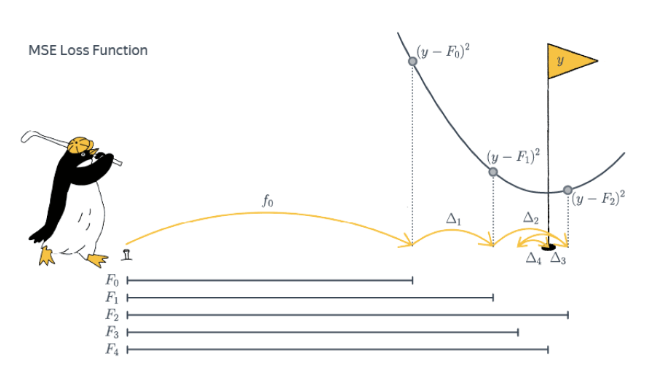

Гольфист не делает случайных ударов. Он оценивает текущее положение мяча относительно лунки и старается скомпенсировать предыдущие ошибки. Подходя к лунке, он ударяет более точно и, возможно, меняет тактику, но он не будет бить так же, как изначально. В конечном итоге комбинация всех ударов приводит мяч в лунку.

Подобно тому, как гольфист постепенно достигает цели, бустинг с каждым новым базовым алгоритмом приближает предсказание к истинному значению метки объекта.

Другая полезная аналогия — разложение функции в ряд Тейлора. В математическом анализе известно, что (достаточно гладкую) функцию $ f(x) $ на интервале $ x \in (a - R, a + R) $ можно представить бесконечной суммой её производных в точке $ a $:
$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!} (x - a)^n. $$

Первое слагаемое в таком разложении грубо приближает $ f(x) $. Прибавляя к ней следующую, мы получим более точное приближение. Каждая следующая элементарная функция увеличивает точность приближения, но менее заметна в общей сумме. Если нам не требуется абсолютно точное разложение, вместо бесконечного ряда Тейлора мы можем ограничиться суммой его первых $𝑘$ элементов. Таким образом, интересующую нас функцию мы с некоторой точностью представили в виде суммы «простых» функций.
Перенесём эту идею на задачи машинного обучения. В машинном обучении мы пытаемся по выборке $(𝑥_𝑖,𝑦_𝑖)$ восстановить неизвестную истинную зависимость. Прежде всего, мы выбираем подходящий алгоритм. Мы можем выбрать «сложный» алгоритм, который сразу хорошо выучит истинную зависимость.
А можем обучить «простой», который выучит истинную зависимость посредственно. Затем мы добавим к нему ещё один такой простой алгоритм, чтобы уточнить предсказание первого алгоритма. Продолжая этот процесс, мы получим сумму простых алгоритмов, где первый алгоритм грубо приближает истинную зависимость, а каждый следующий делает приближение всё точнее.




### Пример задачи регрессии: формальное описание

Рассмотрим задачу регрессии с квадратичной функцией потерь:
$$ L(y, a(x)) = \frac{1}{2} \sum_{i=1}^{N} (y_i - a(x_i))^2 \to \min $$

Для решения задачи используется композиция из $ K $ базовых алгоритмов, принадлежащих семейству $ \mathcal{B} $:
$$ a(x) = a_K(x) = b_1(x) + b_2(x) + \ldots + b_K(x) $$

В качестве базовых алгоритмов выбраны решающие деревья фиксированной глубины, как оговорено в начале раздела.

**Шаг 1: Построение первого базового алгоритма $ b_1(x) $**

Первый базовый алгоритм $ b_1(x) $ обучается наилучшим образом приближать целевую переменную:
$$ b_1(x) = \arg\min_{b \in \mathcal{B}} L(y, b(x)) $$

**Шаг 2: Коррекция с помощью второго базового алгоритма $ b_2(x) $**

Алгоритм $ b_1(x) $, скорее всего, неидеально приближает целевую переменную. Вычислим отклонение его предсказаний от истинных значений:
$$ s_{i1} = y_i - b_1(x_i) $$

Цель второго алгоритма $ b_2(x) $ — предсказывать эти отклонения $ s_{i1} $:
$$ b_2(x) = \arg\min_{b \in \mathcal{B}} L(s_{1}, b(x)) $$

Идеально $ b_2(x) $ должен компенсировать отклонения $ b_1(x) $, так что:
$$ a_2(x_i) = b_1(x_i) + b_2(x_i) = b_1(x_i) + s_{i1} = y_i $$

**Шаг k: Построение композиции из $ K $ базовых алгоритмов**

На $ k $-ом шаге вычисляется отклонение от истинных значений для композиции из $ k-1 $ алгоритмов:
$$ s_{ik-1} = y_i - \sum_{j=1}^{k-1} b_j(x_i) $$

Алгоритм $ b_k(x) $ учится предсказывать эти отклонения:
$$ b_k(x) = \arg\min_{b \in \mathcal{B}} L(s_{k-1}, b(x)) $$

И композиция обновляется следующим образом:
$$ a_k(x) = a_{k-1}(x) + b_k(x) $$

Таким образом, последовательное обучение $ K $ базовых алгоритмов завершает построение композиции $ a_K(x) $.



## Обобщение на другие функции потерь

### Интуиция

Отметим важное свойство функции потерь в примере с регрессией. Рассчитаем производную функции потерь по предсказанию $ z = a_k(x_i) $ для $ i $-го объекта:

$$ \frac{\partial L(y_i, z)}{\partial z} \bigg|_{z=a_k(x_i)} = \frac{\partial}{\partial z} \frac{1}{2}(y_i - z)^2 \bigg|_{z=a_k(x_i)} = a_k(x_i) - y_i $$

Таким образом, ошибка $ s_{ik} $, на которую обучается $ k $-й алгоритм, выражается через производную:

$$ s_{ik} = y_i - a_k(x_i) = - \frac{\partial L(y_i, z)}{\partial z} \bigg|_{z=a_k(x_i)} $$

Для каждого объекта $ x_i $ следующий алгоритм в бустинге обучается предсказывать антиградиент функции потерь по предсказанию модели $ -\frac{\partial L(y_i, z)}{\partial z} \big|_{z=a_k(x_i)} $.

### Обобщение

Это наблюдение позволяет обобщить подход бустинга на произвольные дифференцируемые функции потерь. Вместо обучения на ошибке $ s_{ik} $, обучение проводится на антиградиенте функции потерь $ (-g_{ik}) $, где

$$ g_{ik} = \frac{\partial L(y_i, z)}{\partial z} \bigg|_{z=a_k(x_i)} $$

Можно представить обучение композиции как движение предсказаний из точки $ (a_k(x_1), a_k(x_2), \ldots, a_k(x_N)) $ к точке $ (a_{k+1}(x_1), a_{k+1}(x_2), \ldots, a_{k+1}(x_N)) $. Ожидается, что композиция $ (a_K(x_1), a_K(x_2), \ldots, a_K(x_N)) $ будет как можно ближе к истинным значениям $ (y_1, y_2, \ldots, y_N) $.



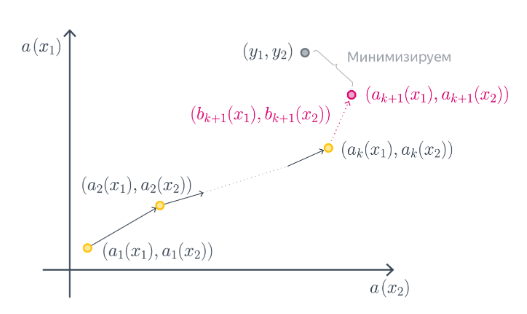

### Роль функции потерь

Для квадратичной функции потерь наша интуиция подтверждается математически. Изменится ли что-либо в наших действиях, если мы поменяем квадратичную функцию потерь на любую другую? С одной стороны, мы, как и прежде, можем двигаться в направлении уменьшения разности предсказания и истинного значения: любая функция потерь поощряет такие шаги для каждого отдельного объекта, ведь для любой адекватной функции потерь выполняется $ L(y, y) = 0 $.

Но с другой стороны, для наискорейшего уменьшения значения функции потерь нам нужно двигаться в направлении её антиградиента по предсказаниям текущей композиции $ (-g_{1k}, \ldots, -g_{Nk}) $. Это направление не обязательно совпадает с направлением уменьшения разности предсказания и истинного значения. Например, может возникнуть ситуация, как показано на рисунке ниже:

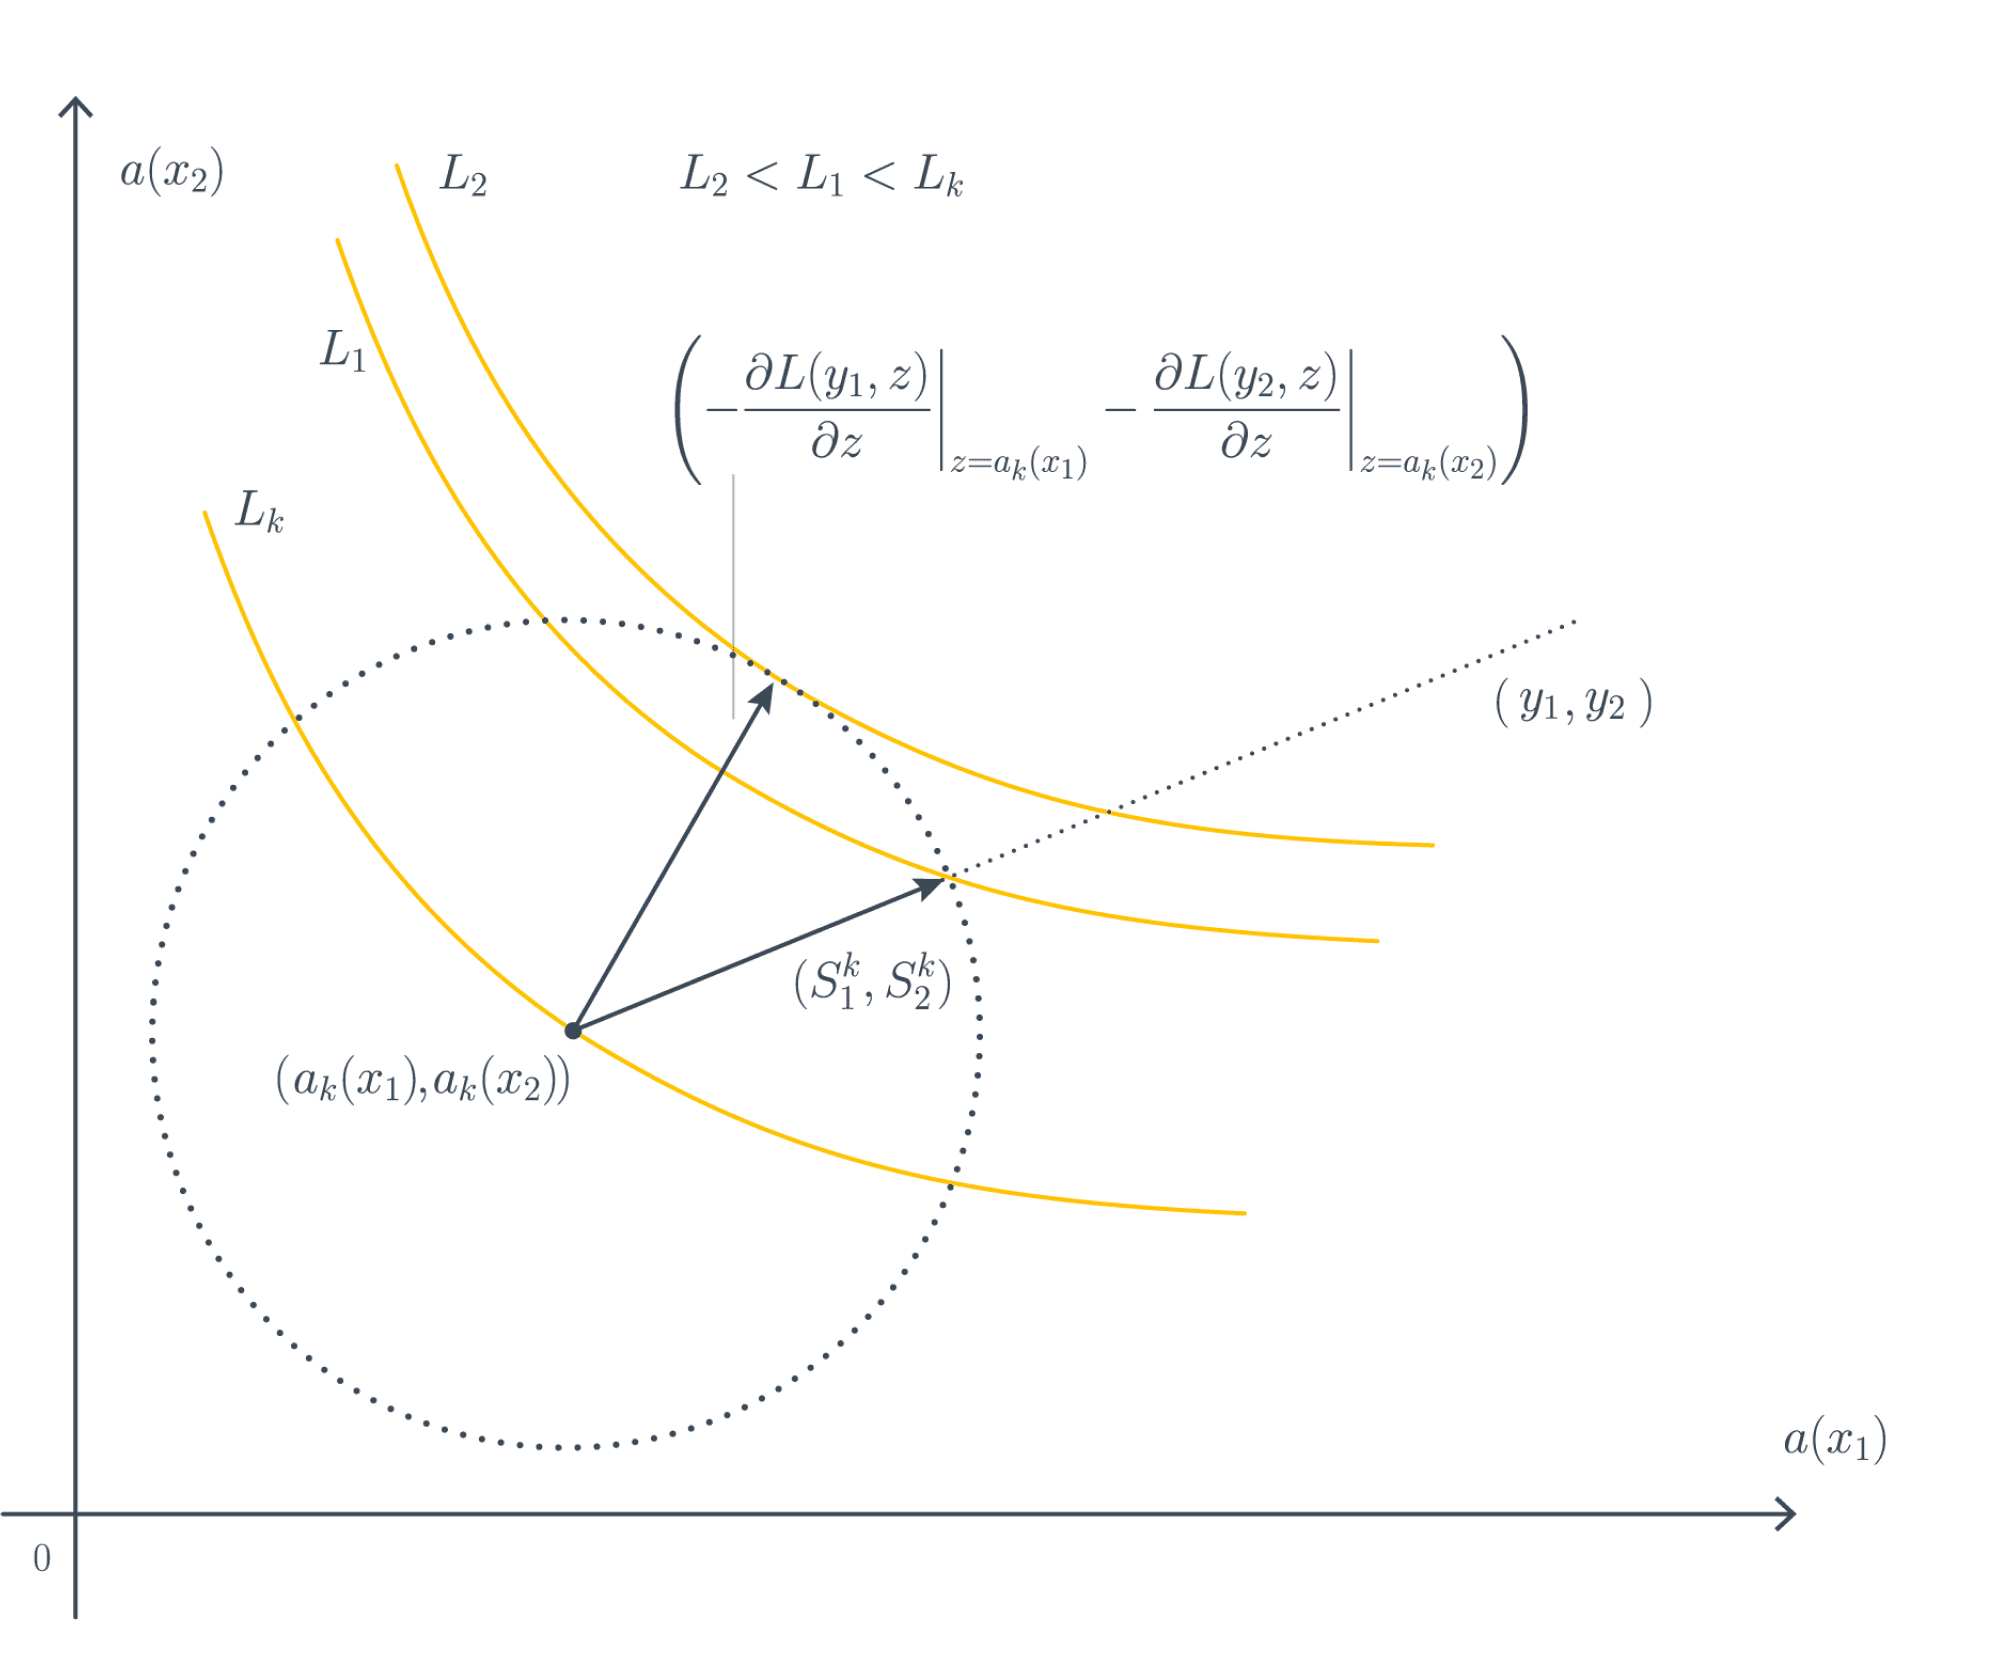



В этом примере рассматриваются два объекта $ x_1 $ и $ x_2 $. Текущее предсказание для них — $ (a_k(x_1), a_k(x_2)) $. Окружность определяет варианты следующего шага: первый вариант — двигаться в направлении $ (s_{1k}, s_{2k}) $, как ранее; второй — двигаться в направлении антиградиента. Также показаны линии уровня значений функции потерь. В данном примере функция потерь устроена так, что $ L_2 < L_1 $, из-за чего движение в направлении антиградиента оказывается более выгодным.

Движение в сторону антиградиента более выгодно с точки зрения минимизации функции потерь и позволяет эффективно работать в случаях, когда нельзя явно посчитать остаток (разницу между целевым значением и предсказанием).

Один из примеров, где это особенно важно, — задача ранжирования. В этой задаче нужно упорядочить объекты в группах по предсказаниям модели так, чтобы полученная перестановка была близка к идеальной по некоторой метрике.

Как определяется идеальная перестановка? Существует два основных способа: в первом случае каждому объекту присваивается число $ y $, по которому можно отсортировать объекты; во втором — задаются пары объектов, указывающие их порядок относительно друг друга. В библиотеке CatBoost для задач ранжирования используется функция потерь PairLogit, вычисляемая по формуле:

$$ \text{PairLogit} = -\sum_{p,n \in \text{Pairs}} \log \left( \frac{1}{1 + e^{-(a_p - a_n)}} \right) \bigg/ |\text{Pairs}| $$

где $ a_p $ и $ a_n $ — предсказания модели на объектах $ p $ и $ n $ соответственно.



### Пример для квадратичной функции потерь

Предположим, у нас есть модель бустинга, состоящая из двух базовых моделей $ a_1(x) $ и $ a_2(x) $, и мы рассматриваем задачу регрессии с квадратичной функцией потерь $ L(y, z) = \frac{1}{2}(y - z)^2 $.

1. **Первый объект $ x_1 $:**
   - Истинное значение $ y_1 = 5 $.
   - Предсказания модели: $ a_1(x_1) = 4 $, $ a_2(x_1) = 1 $.

   **Вычисление антиградиента:**
   $$ g_{11} = \frac{\partial L(y_1, z)}{\partial z} \bigg|_{z=a_1(x_1)} = a_1(x_1) - y_1 = 4 - 5 = -1 $$

   Таким образом, для первого объекта антиградиент $ g_{11} = -1 $, что говорит о том, что следующая модель должна двигаться в сторону увеличения предсказания для уменьшения функции потерь.

2. **Второй объект $ x_2 $:**
   - Истинное значение $ y_2 = 3 $.
   - Предсказания модели: $ a_1(x_2) = 2 $, $ a_2(x_2) = 3 $.

   **Вычисление антиградиента:**
   $$ g_{21} = \frac{\partial L(y_2, z)}{\partial z} \bigg|_{z=a_2(x_2)} = a_2(x_2) - y_2 = 3 - 3 = 0 $$

   Для второго объекта антиградиент $ g_{21} = 0 $, что говорит о том, что текущее предсказание модели уже оптимально по отношению к квадратичной функции потерь.

### Пример для функции потерь PairLogit

Представим, что у нас есть модель бустинга для задачи ранжирования, использующая функцию потерь PairLogit из библиотеки CatBoost. Рассмотрим два объекта $ p $ и $ n $, где $ p $ должен быть выше $ n $ в идеальной перестановке.

1. **Объект $ p $:**
   - Предсказание модели $ a_p = 1.2 $.

2. **Объект $ n $:**
   - Предсказание модели $ a_n = 0.8 $.

   **Вычисление функции потерь PairLogit:**
   $$ \text{PairLogit} = - \log \left( \frac{1}{1 + e^{-(a_p - a_n)}} \right) $$

   $$ \text{PairLogit} = - \log \left( \frac{1}{1 + e^{-(1.2 - 0.8)}} \right) $$
   $$ \text{PairLogit} = - \log \left( \frac{1}{1 + e^{-0.4}} \right) $$
   $$ \text{PairLogit} = - \log \left( \frac{1}{1 + 0.6703} \right) $$
   $$ \text{PairLogit} = - \log \left( 0.5987 \right) $$
   $$ \text{PairLogit} \approx 0.4162 $$

   Таким образом, значение функции потерь PairLogit для пары $ (p, n) $ составляет приблизительно $ 0.4162 $.

Эти примеры демонстрируют, как работают антиградиенты для различных функций потерь в моделях бустинга, и их использование для обучения последующих моделей в композиции.


## Математическое обоснование

Попробуем записать наши интуитивные соображения более формально. Пусть $ L $ – дифференцируемая функция потерь, а наш алгоритм $ a(x) $ представляет собой композицию базовых алгоритмов:

$$ a(x) = a_k(x) = b_1(x) + \ldots + b_k(x) $$

Мы строим нашу композицию «жадно»:

$$ a_k(x) = a_{k-1}(x) + b_k(x), $$

где вновь добавляемый базовый алгоритм $ b_k $ обучается так, чтобы улучшить предсказания текущей композиции:

$$ b_k = \arg \min_{b \in B} \sum_{i=1}^N L(y_i, a_{k-1}(x_i) + b(x_i)). $$

Модель $ b_0 $ выбирается так, чтобы минимизировать потери на обучающей выборке:

$$ b_0 = \arg \min_{b \in B} \sum_{i=1}^N L(y_i, b(x_i)). $$

Для построения базовых алгоритмов на следующих шагах рассмотрим разложение Тейлора функции потерь $ L $ до первого члена в окрестности точки $(y_i, a_{k-1}(x_i))$:

$$ L(y_i, a_{k-1}(x_i) + b(x_i)) \approx L(y_i, a_{k-1}(x_i)) + b(x_i) \frac{\partial L(y_i, z)}{\partial z} \bigg|_{z = a_{k-1}(x_i)} = L(y_i, a_{k-1}(x_i)) + b(x_i) g_{ik-1}, $$

где $ g_{ik-1} = \frac{\partial L(y_i, z)}{\partial z} \bigg|_{z = a_{k-1}(x_i)} $.

Избавившись от постоянных членов, мы получим следующую оптимизационную задачу:

$$ b_k \approx \arg \min_{b \in B} \sum_{i=1}^N b(x_i) g_{ik-1}. $$

Поскольку суммируемое выражение — это скалярное произведение двух векторов, его значение минимизируют $ b(x_i) $, пропорциональные значениям $ -g_{ik-1} $. Поэтому на каждой итерации базовые алгоритмы $ b_k $ обучаются предсказывать значения антиградиента функции потерь по текущим предсказаниям композиции.

Итак, использованная нами интуиция шага в сторону «уменьшения остатка» удивительным образом привела к оптимальным смещениям в случае квадратичной функции потерь, но для других функций потерь это не так: для них смещение происходит в сторону антиградиента.

Получается, что в общем случае на каждой итерации базовые алгоритмы должны приближать значения антиградиента функции потерь. Однако есть частный случай, в котором в качестве таргета для базового алгоритма выгоднее использовать именно «остатки» — это касается функции потерь MAE. Её производная равна -1, 0 или +1.

Приближая базовым алгоритмом антиградиент MAE, количество итераций до сходимости будет расти пропорционально масштабу таргета. То есть, если домножить целевое значение на 10, то потребуется в 10 раз больше итераций градиентного бустинга. Использование остатков в качестве таргета для базового алгоритма не имеет такой проблемы. Аналогичные рассуждения верны также для функции MAPE, в которой проблема с масштабом таргета может проявляться еще сильнее.

### Обучение базового алгоритма

При построении очередного базового алгоритма $ b_{k+1} $ мы решаем задачу регрессии с таргетом, равным антиградиенту функции потерь исходной задачи на предсказании $ a_k = b_1 + \ldots + b_k $.

Теоретически можно воспользоваться любым методом построения регрессионного дерева. Важно выбрать оценочную функцию $ S $, которая будет показывать, насколько текущая структура дерева хорошо приближает антиградиент. Её нужно будет использовать для построения критерия ветвления:

$$ |R| \cdot S(R) - |R_{\text{right}}| \cdot S(R_{\text{right}}) - |R_{\text{left}}| \cdot S(R_{\text{left}}) \rightarrow \max, $$

где $ S(R) $ — значение функции $ S $ в вершине $ R $, $ S(R_{\text{left}}) $ и $ S(R_{\text{right}}) $ — значения в левом и правом потомках $ R $ после добавления предиката, $|\cdot|$ — количество элементов, пришедших в вершину.

Например, можно использовать следующие оценочные функции:

$$ L_2(g, p) = \sum_{i=1}^N (p_i - g_i)^2, $$

$$ \text{Cosine}(g, p) = -\frac{\sum_{i=1}^N p_i \cdot g_i}{\sqrt{\sum_{i=1}^N p_i^2} \cdot \sqrt{\sum_{i=1}^N g_i^2}}, $$

где $ p_i $ — предсказание дерева на объекте $ x_i $, $ g_i $ — антиградиент, на который учится дерево, $ p = \{p_i\}_{i=1}^N $, $ g = \{g_i\}_{i=1}^N $. Функция $ L_2 $ представляет собой среднеквадратичную ошибку, а функция $ \text{Cosine} $ определяет близость через косинусное расстояние между векторами предсказаний и антиградиентов.

В итоге обучение базового алгоритма проходит в два шага:
1. По функции потерь вычисляется целевая переменная для обучения следующего базового алгоритма:

$$ g_{ik} = \frac{\partial L(y_i, z)}{\partial z} \bigg|_{z = a_k(x_i)} $$

2. Строится регрессионное дерево на обучающей выборке $(x_i, -g_{ik})$, минимизирующее выбранную оценочную функцию.

Рассмотрим конкретный числовой пример для иллюстрации метода градиентного бустинга. Мы будем использовать квадратичную функцию потерь (MSE) и предположим, что наша задача — предсказание числового значения $ y $ на основе входного признака $ x $.

### Исходные данные

Допустим, у нас есть следующие данные:

| $ x $ | $ y $  |
|--------|---------|
| 1      | 1       |
| 2      | 2       |
| 3      | 3       |
| 4      | 4       |
| 5      | 5       |

### Шаг 1: Инициализация модели

На первом шаге инициализируем модель $ a_0(x) $. Пусть $ a_0(x) $ будет просто средним значением целевой переменной $ y $:

$$ a_0(x) = \frac{1+2+3+4+5}{5} = 3. $$

### Шаг 2: Вычисление градиента

Для каждого объекта вычислим значение градиента функции потерь MSE. Градиент MSE по текущему предсказанию $ a_k(x_i) $ для каждого объекта равен:

$$ g_i = \frac{\partial L(y_i, z)}{\partial z} \bigg|_{z = a_k(x_i)} = 2 \cdot (a_k(x_i) - y_i). $$

Подставим $ a_0(x) = 3 $:

|  x  |  y  | a0(x)  |  g  |
|--------|---------|-------------|---------|
| 1      | 1       | 3           | 2 \cdot (3 - 1) = 4   |
| 2      | 2       | 3           | 2 \cdot (3 - 2) = 2   |
| 3      | 3       | 3           | 2 \cdot (3 - 3) = 0   |
| 4      | 4       | 3           | 2 \cdot (3 - 4) = -2  |
| 5      | 5       | 3           | 2 \cdot (3 - 5) = -4  |

### Шаг 3: Обучение базового алгоритма

Теперь обучаем базовый алгоритм $ b_1(x) $ предсказывать значения антиградиента:

| $ x $ | $ g $ |
|--------|---------|
| 1      | 4       |
| 2      | 2       |
| 3      | 0       |
| 4      | -2      |
| 5      | -4      |

Допустим, базовый алгоритм $ b_1(x) $ — это простая линейная регрессия. Обучим линейную модель на этих данных и получим:

$$ b_1(x) = -2 \cdot x + 6. $$

### Шаг 4: Обновление композиции

Обновим композицию, добавив новый базовый алгоритм:

$$ a_1(x) = a_0(x) + b_1(x). $$

Теперь посчитаем новые предсказания:

| $ x $ | $ a_0(x) $ | $ b_1(x) $ | $ a_1(x) $ |
|--------|-------------|--------------|-------------|
| 1      | 3           | 4            | 3 + 4 = 7   |
| 2      | 3           | 2            | 3 + 2 = 5   |
| 3      | 3           | 0            | 3 + 0 = 3   |
| 4      | 3           | -2           | 3 - 2 = 1   |
| 5      | 3           | -4           | 3 - 4 = -1  |

### Шаг 5: Итерация

Повторим шаги 2-4 для $ k = 2 $.

1. Вычислим новые значения градиента $ g_i $:

$$ g_i = 2 \cdot (a_1(x_i) - y_i). $$

|  x  |  y  |  a1(x)  | g  |
|--------|---------|-------------|---------|
| 1      | 1       | 7           | 2 $\cdot$ (7 - 1) = 12  |
| 2      | 2       | 5           | 2 $\cdot$ (5 - 2) = 6   |
| 3      | 3       | 3           | 2 $\cdot$ (3 - 3) = 0   |
| 4      | 4       | 1           | 2 $\cdot$ (1 - 4) = -6  |
| 5      | 5       | -1          | 2 $\cdot$ (-1 - 5) = -12 |

2. Обучим новый базовый алгоритм $ b_2(x) $ на новых значениях антиградиента. Опять предположим, что базовый алгоритм — это линейная модель:

| $ x $ | $ g $  |
|--------|---------|
| 1      | 12      |
| 2      | 6       |
| 3      | 0       |
| 4      | -6      |
| 5      | -12     |

Получим:

$$ b_2(x) = -6 \cdot x + 18. $$

3. Обновим композицию:

$$ a_2(x) = a_1(x) + b_2(x). $$

Посчитаем новые предсказания:

|  x  |  a1(x)  | b2(x)  |  a2(x)   |
|--------|-------------|--------------|-------------|
| 1      | 7           | 12           | 7 + 12 = 19  |
| 2      | 5           | 6            | 5 + 6 = 11   |
| 3      | 3           | 0            | 3 + 0 = 3    |
| 4      | 1           | -6           | 1 - 6 = -5   |
| 5      | -1          | -12          | -1 - 12 = -13 |

### Шаг 6: Продолжение

Повторяем шаги 2-4 до тех пор, пока модель не начнёт сходиться или не будет достигнута требуемая точность.

Таким образом, мы шаг за шагом улучшаем нашу модель, обучая новые базовые алгоритмы на антиградиентах функции потерь, приближая итоговые предсказания к целевым значениям.


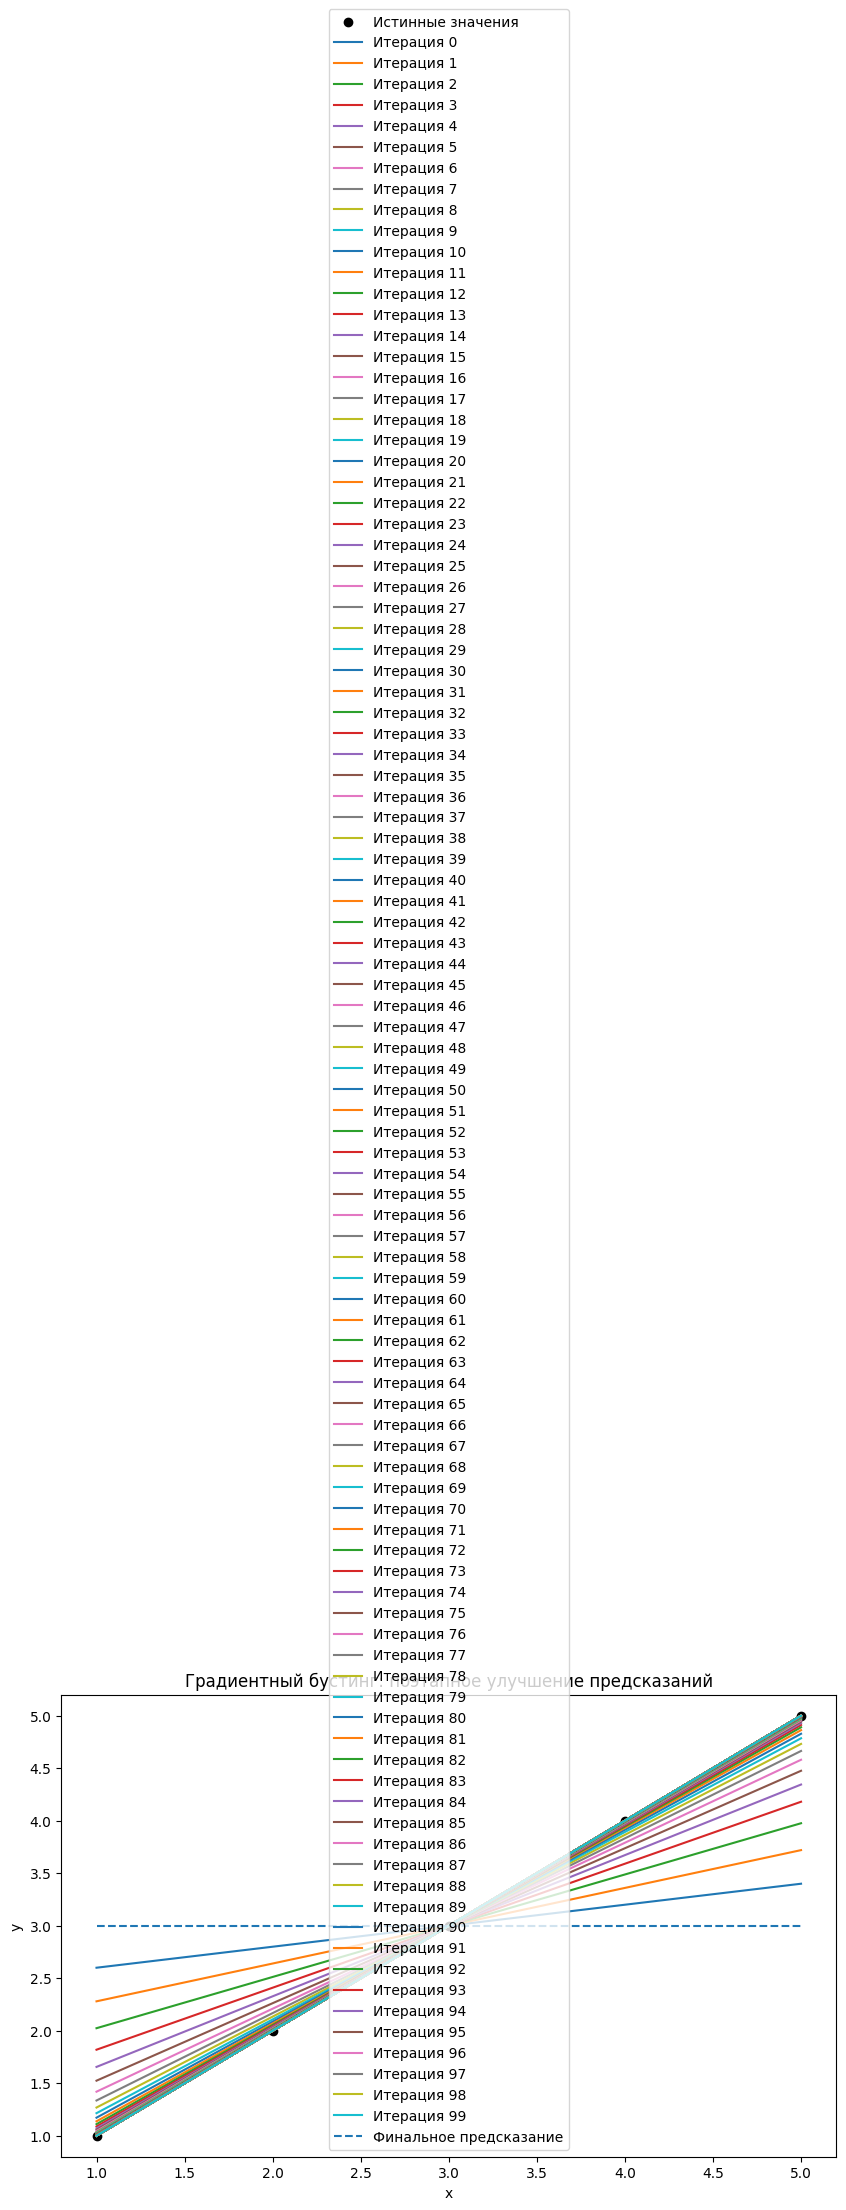

Предсказания: [2.99999999 2.99999999 3.         3.00000001 3.00000001]
Истинные значения: [1 2 3 4 5]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])

# Инициализация начальной модели
a_0 = np.mean(y)
a_k = np.full_like(y, a_0, dtype=float)
models = []

# Количество итераций бустинга
n_iterations = 100
learning_rate = 0.1

# Для визуализации
predictions_history = []

for k in range(n_iterations):
    # Вычисление градиентов
    gradients = 2 * (a_k - y)

    # Обучение линейной модели для предсказания антиградиентов
    A = np.vstack([X, np.ones(len(X))]).T
    m, c = np.linalg.lstsq(A, gradients, rcond=None)[0]

    # Функция базового алгоритма
    b_k = lambda x: m * x + c

    # Сохранение модели
    models.append(b_k)

    # Обновление композиции
    a_k -= learning_rate * b_k(X)

    # Сохранение предсказаний для визуализации
    predictions_history.append(a_k.copy())

# Предсказание
def predict(x):
    pred = np.full_like(x, a_0, dtype=float)
    for model in models:
        pred -= learning_rate * model(x)
    return pred

# Пример использования
x_test = np.array([1, 2, 3, 4, 5])
predictions = predict(x_test)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Истинные значения')

for i, preds in enumerate(predictions_history):
    plt.plot(X, preds, label=f'Итерация {i}')

plt.plot(x_test, predictions, label='Финальное предсказание', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Градиентный бустинг: поэтапное улучшение предсказаний')
plt.show()

print(f"Предсказания: {predictions}")
print(f"Истинные значения: {y}")

##На практике
Поскольку для построения градиентного бустинга достаточно уметь считать градиент функции потерь по предсказаниям, с его помощью можно решать широкий спектр задач. В библиотеках градиентного бустинга даже реализована возможность создавать свои функции потерь: для этого достаточно уметь вычислять их градиент, зная истинные значения и текущие предсказания для элементов обучающей выборки.

Типичный градиентный бустинг включает в себя несколько тысяч деревьев решений, которые необходимо строить последовательно. Построение решающего дерева на выборках типичного размера и современном железе, даже с учетом всех оптимизаций, требует небольшого, но всё-таки заметного времени (0.1-1 с), которое для всего ансамбля превратится в десятки минут. Это не так быстро, как обучение линейных моделей, но всё-таки значительно быстрее, чем обучение типичных нейросетей.

### Темп обучения (learning rate)
Обучение композиции с помощью градиентного бустинга может привести к переобучению, если базовые алгоритмы слишком сложные. Например, если сделать решающие деревья слишком глубокими (более 10 уровней), то при обучении бустинга ошибка на обучающей выборке даже при довольно скромном $ K $ может приблизиться к нулю, то есть предсказание будет почти идеальным, но на тестовой выборке всё будет плохо.

Существует два решения этой проблемы:
1. Во-первых, необходимо упростить базовую модель, уменьшив глубину дерева (либо применив какие-либо другие техники регуляризации).
2. Во-вторых, можно ввести параметр, называемый темпом обучения (learning rate) $ \eta \in (0, 1] $:

$$
a_{k+1}(x) = a_k(x) + \eta b_{k+1}(x)
$$

Присутствие этого параметра означает, что каждый базовый алгоритм вносит относительно небольшой вклад во всю композицию. Если расписать сумму целиком, она будет иметь вид:

$$
a_{k+1}(x) = b_1(x) + \eta b_2(x) + \eta b_3(x) + \dots + \eta b_{k+1}(x)
$$

Значение параметра обычно определяется эмпирически по входным данным. В библиотеке CatBoost темп обучения может быть выбран автоматически по набору данных. Для этого используется заранее обученная линейная модель, предсказывающая темп обучения по мета-параметрам выборки данных: числу объектов, числу признаков и другим.

Темп обучения связан с количеством итераций градиентного бустинга. Чем меньше $ \eta $, тем больше итераций потребуется для достижения того же качества на обучающей выборке.


##Feature importance (Важность признаков)

Отдельные деревья решений можно легко интерпретировать, просто визуализируя их структуру. Однако модель градиентного бустинга содержит сотни деревьев, поэтому её сложно интерпретировать с помощью визуализации входящих в неё деревьев. При этом хотелось бы, как минимум, понимать, какие именно признаки в данных оказывают наибольшее влияние на предсказание модели.

Можно сделать следующее наблюдение: признаки из верхней части дерева влияют на окончательное предсказание для большей доли обучающих объектов, чем признаки, попавшие на более глубокие уровни. Таким образом, ожидаемая доля обучающих объектов, для которых происходило ветвление по данному признаку, может быть использована в качестве оценки его относительной важности для итогового предсказания. Усредняя полученные оценки важности признаков по всем решающим деревьям из ансамбля, можно уменьшить дисперсию такой оценки и использовать её для отбора признаков. Этот метод известен как MDI (mean decrease in impurity).

Существуют и другие методы оценки важности признаков для ансамблей: например, Permutation feature importance (см. описание в sklearn) и множество разных подходов, предлагаемых в библиотеке CatBoost. Все эти техники отбора признаков применимы также и для случайных лесов.

## Реализации

Для общего развития имеет смысл посмотреть реализацию в sklearn, но на практике она весьма медленная и не такая уж умная. Хороших реализаций GBDT есть, как минимум, три: LightGBM, XGBoost и CatBoost. Исторически они отличались довольно сильно, но за последние годы успели скопировать друг у друга все хорошие идеи.


## Форма деревьев

Одно из основных отличий LightGBM, XGBoost и CatBoost — форма решающих деревьев.

**LightGBM** строит деревья по принципу: "На каждом шаге делим вершину с наилучшим скором", при этом основным критерием остановки является максимально допустимое количество вершин в дереве. Это приводит к несимметричным деревьям, где поддеревья могут иметь разную глубину. Например, левое поддерево может иметь глубину 2, а правое — 15. Такой подход позволяет быстрее подстраиваться под обучающие данные, однако не контролирует глубину эффективно, что может привести к переобучению. LightGBM также предоставляет возможность ограничивать максимальную глубину деревьев, но она обычно выше, чем у XGBoost и CatBoost.


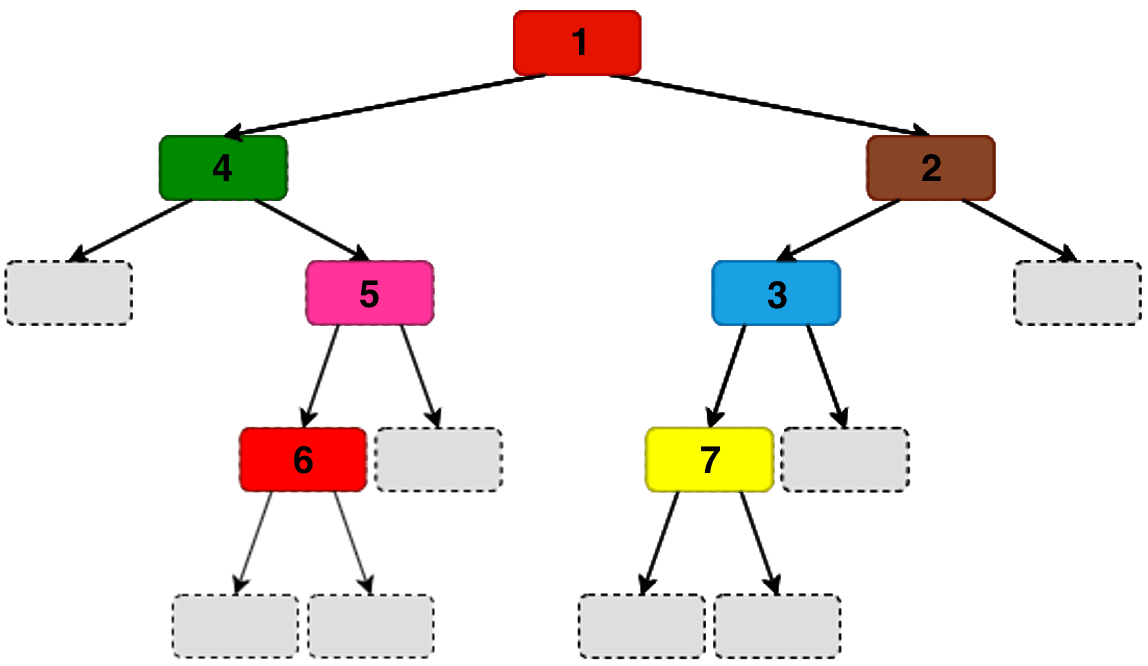

**XGBoost** строит деревья последовательно по уровням до достижения максимальной глубины. Отдельного ограничения на количество вершин нет, оно определяется максимальной глубиной дерева. В XGBoost стремятся к симметричности деревьев по глубине, идеально получая полное бинарное дерево при условии соблюдения ограничений на минимальное количество объектов в листе. Такие деревья обычно более устойчивы к переобучению.

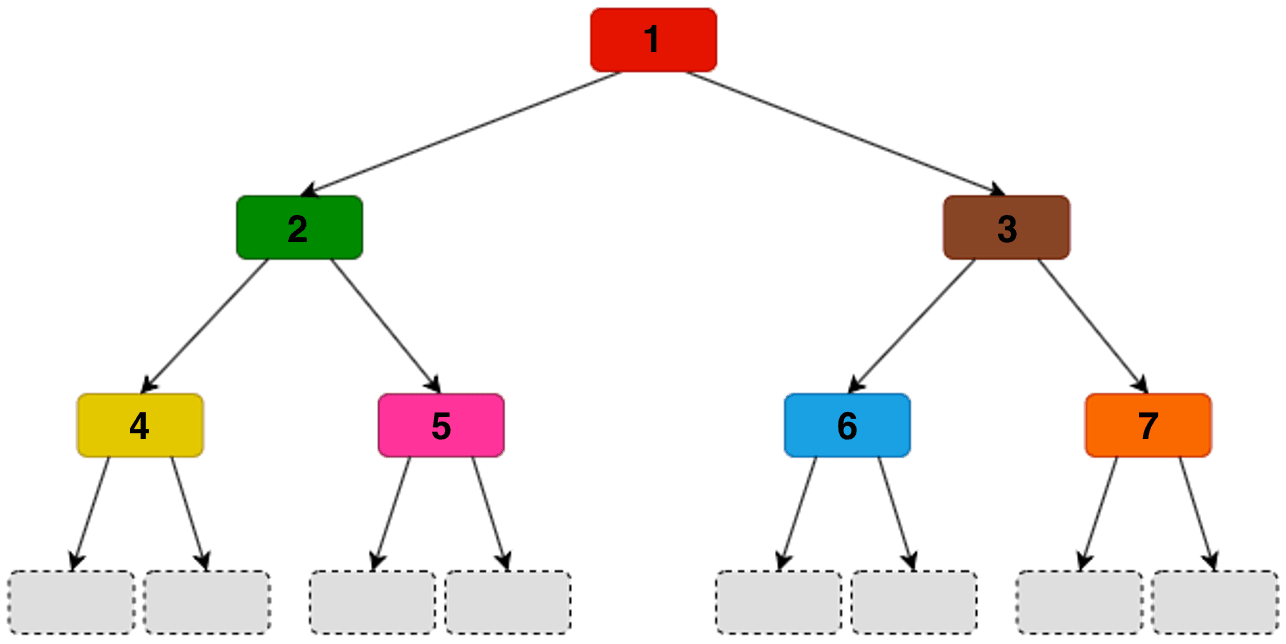

**CatBoost** строит деревья, у которых все вершины одного уровня имеют одинаковый предикат. Это позволяет избежать ветвлений (конструкций if-else) в коде инференса модели с помощью битовых операций, ускоряя применение модели, особенно на батчах. Такой подход также действует как сильная регуляризация, делая модель более устойчивой к переобучению. Основной критерий остановки — ограничение на глубину дерева. В CatBoost используются только полные бинарные деревья, даже если в некоторые поддеревья не попадает ни один объект из обучающей выборки.

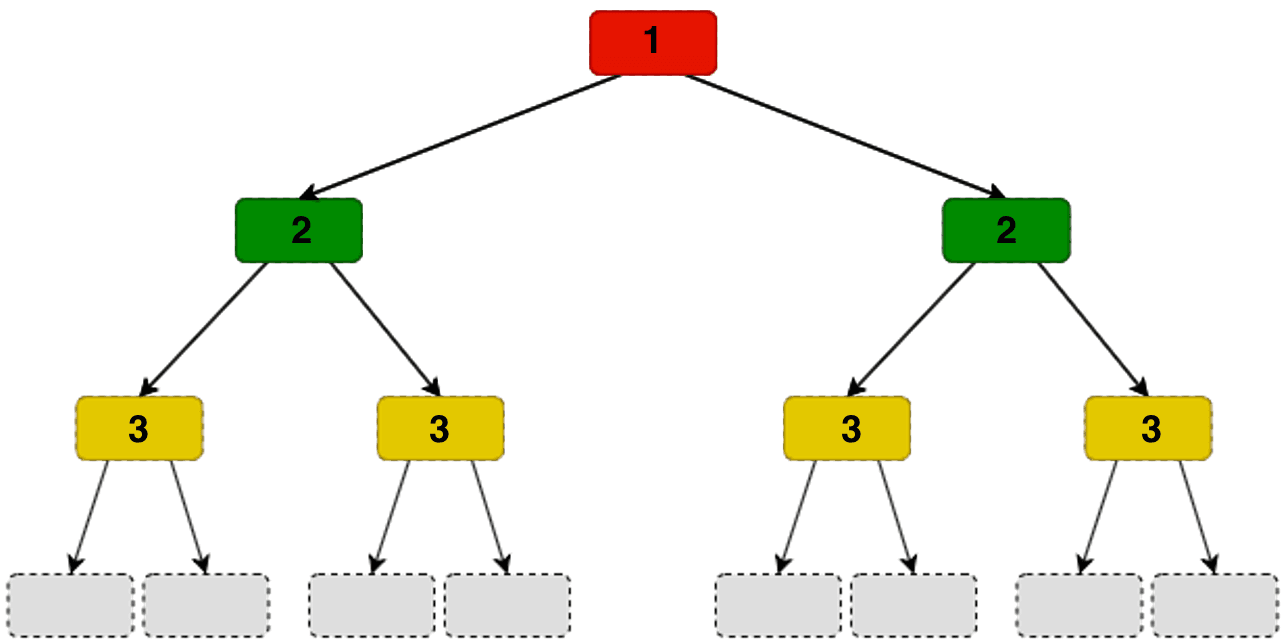




## Где используется градиентный бустинг

Градиентный бустинг применяется повсеместно. Сегодня это один из основных методов машинного обучения наряду с нейронными сетями. Формально градиентный бустинг слабее и менее гибок, чем сети, но выигрывает в простоте настройки темпа обучения и применения, размере и интерпретируемости модели.
Во многих компаниях, так или иначе связанных с ML, он используется для всех задач, которые не связаны с однородными данными (картинками, текстами, и так далее). Типичный поисковый запрос в Яндексе, выбор отеля на Booking.com или сериала на вечер в Netflix задействует несколько десятков моделей GBDT.
Впрочем, в будущем можно ожидать плавного исчезновения этого подхода, так как улучшение архитектур глубинного обучения и дальнейшее развитие железа нивелирует его преимущество по сравнению с нейросетями.



## Литература
1. https://education.yandex.ru/handbook/ml/article/gradientnyj-busting
2. https://explained.ai/gradient-boosting/L2-loss.html
3.